In [25]:
import pandas as pd

In [26]:
result_df = pd.read_csv(r'C:\Users\CHOI\공모전\데이터\result.csv', encoding = 'cp949')
highway_df = pd.read_csv(r'C:\Users\CHOI\공모전\데이터\도로정보.csv', encoding = 'cp949')

In [27]:
# 노선명을 기준으로 그룹화하고 평균 차로 수를 계산하여 새로운 컬럼에 저장
highway_df['노선 평균 차로 수'] = highway_df.groupby('노선번호')['차로수'].transform('mean')

# 쉼표 제거 및 int로 변환
highway_df['계'] = highway_df['계'].str.replace(',', '').astype(int)

# 노선명을 기준으로 그룹화하고 평균 차량 이동량 계산하여 새로운 컬럼에 저장
highway_df['노선 일 평균 이동 차량 수'] = highway_df.groupby('노선번호')['계'].transform('sum')

# 노선명을 기준으로 그룹화하고 평균 차량 이동량 계산하여 새로운 컬럼에 저장
highway_df['노선 길이'] = highway_df.groupby('노선번호')['연장(km)'].transform('sum')

highway_df = highway_df.rename(columns={'노선번호': ' 노선명 '})

In [28]:
# highway_df에서 필요한 컬럼 선택
highway_df_selected = highway_df[[' 노선명 ', '노선 평균 차로 수', '노선 길이', '노선 일 평균 이동 차량 수']]

# 선택한 컬럼들을 기준으로 left join 수행
result_df = pd.merge(result_df, highway_df_selected, on=' 노선명 ', how='left')

In [29]:
mean_line_count = highway_df['노선 평균 차로 수'].mean()
mean_line_length = highway_df['노선 길이'].mean()
mean_line_car = highway_df['노선 일 평균 이동 차량 수'].mean()

In [30]:
# 결측치 보간
result_df['노선 평균 차로 수'].fillna(mean_line_count, inplace=True)
result_df['노선 길이'].fillna(mean_line_length, inplace=True)
result_df['노선 일 평균 이동 차량 수'].fillna(mean_line_car, inplace=True)

# 필요없는 컬럼 드랍
columns_to_drop = [' 본부명 ', ' 지사명 ',' 구간 ', ' 방 향 ', ' 5km ']
result_df = result_df.drop(columns=columns_to_drop, axis=1)

# '반경 동물 개체 수' 컬럼의 0 값을 평균값으로 대체
mean_value = result_df[result_df['반경 동물 개체 수'] != 0]['반경 동물 개체 수'].mean()
result_df['반경 동물 개체 수'] = result_df['반경 동물 개체 수'].replace(0, mean_value)

In [31]:
 result_df.head(2)

,노선명,발생건수,위도,경도,발생년도,울타리 평균 길이,울타리 평균 높이,반경 생태통로 수,반경 동물 개체 수,노선 평균 제한 속도,노선 평균 차로 수,노선 길이,노선 일 평균 이동 차량 수
0,중앙선,13,37.340987,127.912591,2022,351.9,1.45,0,1500.0,98.571429,4.0,287.6,1243698.0
1,중앙선,13,37.340987,127.912591,2022,351.9,1.45,0,1500.0,98.571429,4.0,287.6,1243698.0


In [32]:
'''
# CSV 파일로 저장 (인코딩: cp949)
result_df.to_csv('final.csv', index=False, encoding='cp949')
'''

"\n# CSV 파일로 저장 (인코딩: cp949)\nresult_df.to_csv('final.csv', index=False, encoding='cp949')\n"

### 파생변수 생성

km 당 차로 수 = 노선 일 평균 이동 차량 수 / 노선 길이  

개체 마리 당 생태통로 = 반경 생태통로 수 / 반경 동물 개체 수

개체 마리 당 울타리 길이 = 울타리 평균 길이 / 반경 동물 개체 수



In [33]:
result_df['km 당 차량 수'] = result_df['노선 일 평균 이동 차량 수'] / result_df['노선 길이']
result_df['개체 마리 당 생태통로'] = result_df['반경 생태통로 수'] / result_df['반경 동물 개체 수']
result_df['개체 마리 당 울타리 길이'] = result_df['울타리 평균 길이'] / result_df['반경 동물 개체 수']

In [34]:
result_df.head(1)

,노선명,발생건수,위도,경도,발생년도,울타리 평균 길이,울타리 평균 높이,반경 생태통로 수,반경 동물 개체 수,노선 평균 제한 속도,노선 평균 차로 수,노선 길이,노선 일 평균 이동 차량 수,km 당 차량 수,개체 마리 당 생태통로,개체 마리 당 울타리 길이
0,중앙선,13,37.340987,127.912591,2022,351.9,1.45,0,1500.0,98.571429,4.0,287.6,1243698.0,4324.401947,0.0,0.2346


In [35]:
# 컬럼 이름들을 출력
column_names = result_df.columns
print(column_names)
len(column_names)

Index([' 노선명 ', ' 발생건수 ', '위도', '경도', '발생년도', '울타리 평균 길이', '울타리 평균 높이',
       '반경 생태통로 수', '반경 동물 개체 수', '노선 평균 제한 속도', '노선 평균 차로 수', '노선 길이',
       '노선 일 평균 이동 차량 수', 'km 당 차량 수', '개체 마리 당 생태통로', '개체 마리 당 울타리 길이'],
      dtype='object')


16

### 컬럼 정규화

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
result_df.describe()

,발생건수,위도,경도,발생년도,울타리 평균 길이,울타리 평균 높이,반경 생태통로 수,반경 동물 개체 수,노선 평균 제한 속도,노선 평균 차로 수,노선 길이,노선 일 평균 이동 차량 수,km 당 차량 수,개체 마리 당 생태통로,개체 마리 당 울타리 길이
count,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,1.322200e+04,13222.000000,13222.000000,13222.000000
mean,4.172440,36.734127,127.495096,2020.480033,233.916430,1.573813,0.582211,934.115179,103.111029,5.260513,321.095460,3.013859e+06,8917.367534,0.003218,0.792351
std,1.883949,0.680979,0.531332,1.114510,104.151569,0.084367,1.116338,905.559165,4.495515,1.233995,75.287552,1.912325e+06,4579.377052,0.009160,1.240653
min,3.000000,34.849629,126.439164,2019.000000,87.750000,1.384615,0.000000,50.000000,92.500000,4.000000,13.300000,1.214670e+05,1887.165354,0.000000,0.018578
25%,3.000000,36.379549,127.256395,2020.000000,161.322581,1.520000,0.000000,300.000000,98.571429,4.268823,287.600000,1.261578e+06,6431.939850,0.000000,0.140387
50%,4.000000,36.778273,127.435833,2020.000000,210.580645,1.562500,0.000000,700.000000,102.500000,4.500000,332.500000,2.138620e+06,7913.261968,0.000000,0.303771
75%,4.000000,37.248957,127.797000,2021.000000,284.420455,1.645161,1.000000,1300.000000,105.000000,6.883142,396.150000,5.440321e+06,14632.150925,0.001000,0.768889
max,15.000000,38.057000,129.130000,2022.000000,631.526316,1.769231,7.000000,6800.000000,110.000000,7.103448,416.100000,6.088438e+06,46666.588235,0.060000,6.322778


In [38]:
# 정규화할 열 선택
columns_to_normalize = [' 발생건수 ', '울타리 평균 길이', '울타리 평균 높이',
       '반경 생태통로 수', '반경 동물 개체 수', '노선 평균 차로 수', '노선 길이',
       '노선 일 평균 이동 차량 수', 'km 당 차량 수', '개체 마리 당 생태통로', '개체 마리 당 울타리 길이']

# Min-Max 스케일러 생성
scaler = MinMaxScaler()

# 정규화할 열들에 대해 Min-Max 스케일링 수행
result_df[columns_to_normalize] = scaler.fit_transform(result_df[columns_to_normalize])

In [39]:
result_df.head(1)

,노선명,발생건수,위도,경도,발생년도,울타리 평균 길이,울타리 평균 높이,반경 생태통로 수,반경 동물 개체 수,노선 평균 제한 속도,노선 평균 차로 수,노선 길이,노선 일 평균 이동 차량 수,km 당 차량 수,개체 마리 당 생태통로,개체 마리 당 울타리 길이
0,중앙선,0.833333,37.340987,127.912591,2022,0.48577,0.17,0.0,0.214815,98.571429,0.0,0.680983,0.188074,0.054428,0.0,0.034266


In [40]:
selected_columns = [' 발생건수 ', '울타리 평균 높이',
       '반경 생태통로 수', '반경 동물 개체 수', '노선 평균 차로 수',
       '노선 일 평균 이동 차량 수', 'km 당 차량 수', '개체 마리 당 생태통로', '개체 마리 당 울타리 길이']

correlation = result_df[selected_columns].corr()

In [41]:
correlation

,발생건수,울타리 평균 높이,반경 생태통로 수,반경 동물 개체 수,노선 평균 차로 수,노선 일 평균 이동 차량 수,km 당 차량 수,개체 마리 당 생태통로,개체 마리 당 울타리 길이
발생건수,1.000000,-0.084791,-0.067233,0.088986,-0.119803,-0.089844,-0.061271,-0.080021,-0.071839
울타리 평균 높이,-0.084791,1.000000,0.121116,-0.043033,-0.046832,-0.072274,-0.051060,0.218889,0.058377
반경 생태통로 수,-0.067233,0.121116,1.000000,-0.236975,0.188989,0.214038,0.165480,0.640219,0.241080
반경 동물 개체 수,0.088986,-0.043033,-0.236975,1.000000,-0.229472,-0.297456,-0.234417,-0.292251,-0.450624
노선 평균 차로 수,-0.119803,-0.046832,0.188989,-0.229472,1.000000,0.958005,0.907653,0.281205,0.238081
노선 일 평균 이동 차량 수,-0.089844,-0.072274,0.214038,-0.297456,0.958005,1.000000,0.866054,0.322455,0.297471
km 당 차량 수,-0.061271,-0.051060,0.165480,-0.234417,0.907653,0.866054,1.000000,0.236067,0.209140
개체 마리 당 생태통로,-0.080021,0.218889,0.640219,-0.292251,0.281205,0.322455,0.236067,1.000000,0.683527
개체 마리 당 울타리 길이,-0.071839,0.058377,0.241080,-0.450624,0.238081,0.297471,0.209140,0.683527,1.000000


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# 발생건수와 다른 파라미터 간의 상관관계만 추출
correlation_with_occurrences = result_df[[' 발생건수 ', '울타리 평균 높이',
       '반경 생태통로 수', '반경 동물 개체 수', '노선 평균 차로 수',
       '노선 일 평균 이동 차량 수', 'km 당 차량 수', '개체 마리 당 생태통로', '개체 마리 당 울타리 길이']].corr()[[' 발생건수 ']]


In [44]:
correlation_with_occurrences

,발생건수
발생건수,1.000000
울타리 평균 높이,-0.084791
반경 생태통로 수,-0.067233
반경 동물 개체 수,0.088986
노선 평균 차로 수,-0.119803
노선 일 평균 이동 차량 수,-0.089844
km 당 차량 수,-0.061271
개체 마리 당 생태통로,-0.080021
개체 마리 당 울타리 길이,-0.071839


In [45]:
import matplotlib.font_manager as fm

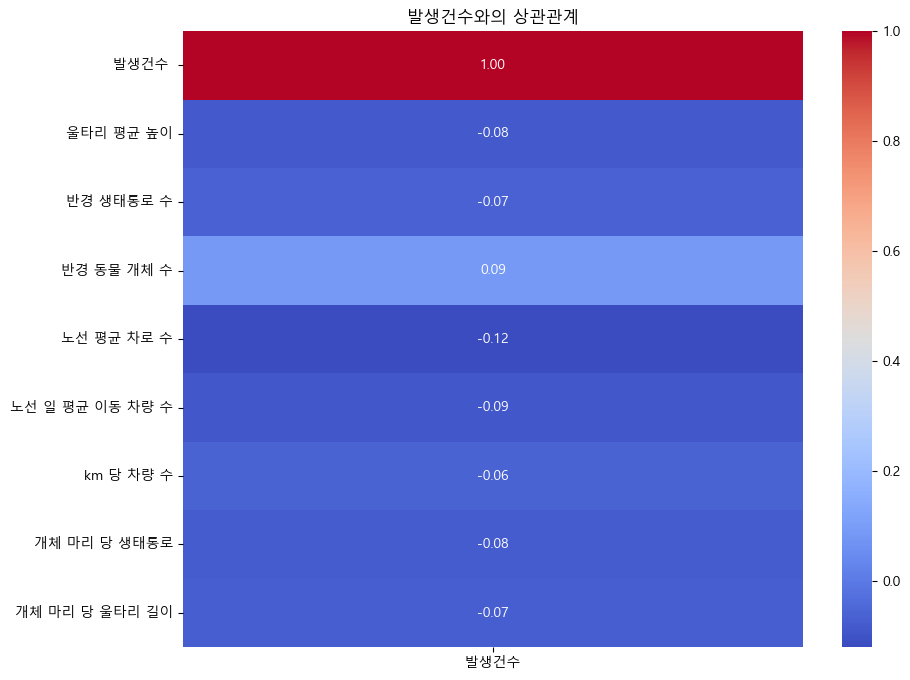

In [46]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 발생건수와 다른 파라미터 간의 상관관계만 추출
correlation_with_occurrences = result_df[[' 발생건수 ', '울타리 평균 높이',
       '반경 생태통로 수', '반경 동물 개체 수', '노선 평균 차로 수',
       '노선 일 평균 이동 차량 수', 'km 당 차량 수', '개체 마리 당 생태통로', '개체 마리 당 울타리 길이']].corr()[[' 발생건수 ']]

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_occurrences, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('발생건수와의 상관관계')
plt.show()

In [47]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
def calculate_vif(dataframe):
    # 데이터프레임의 모든 컬럼을 대상으로 VIF 계산
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    
    return vif_data


# VIF 계산
vif_result = calculate_vif(result_df[[' 발생건수 ', '울타리 평균 높이',
       '반경 생태통로 수', '반경 동물 개체 수', '노선 평균 제한 속도', '노선 평균 차로 수',
       '노선 일 평균 이동 차량 수', 'km 당 차로 수', '개체 마리 당 생태통로', '개체 마리 당 울타리 길이']])
vif_result

KeyError: "['km 당 차로 수'] not in index"